In [1]:
import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%pylab inline

# for this session, make the figure size bigger
pylab.rcParams['figure.figsize'] = 10,10

# be able to include images in the notebook
from IPython.display import Image

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read data from mesa data: 
a = pd.read_excel("/Users/sailor/Desktop/asro_work/git_fun/xinlong_file/initial-model_prepare/ONe6040_update.xlsx")

# read data from Maestro data:
ds = yt.load("ECSN_full/smallplt0000001_512/")
name = ds.fullpath.split('/')[-1]

# read data form initial model
f = open("/Users/sailor/Desktop/asro_work/git_fun/xinlong_file/initial-model_prepare/ECSN-ONe6040-final.hse.20480","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')

for i in range(len(data2d)-1,-1,-1):
    if len(data2d[i]) == 3:
        aaaaa = data2d[i].copy()
        data2d.pop(i)
        i+=1
    else:
        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f29','he4','al27','si28','s32','p31','h1']
df.head()

yt : [INFO     ] 2019-05-05 02:58:47,673 Parameters: current_time              = 4.9134586701271707e-05
yt : [INFO     ] 2019-05-05 02:58:47,675 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2019-05-05 02:58:47,677 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-05 02:58:47,679 Parameters: domain_right_edge         = [4.e+08 4.e+08 4.e+08]


,radius,density,temperature,pressure,ne20,o16,o20,mg24,f29,he4,al27,si28,s32,p31,h1
0,4882.8125,8.348568e+09,6.565856e+08,7.367389e+27,0.007297,0.599995,0.392705,4.964888e-16,2.021104e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
1,14648.4375,8.348566e+09,6.565866e+08,7.367387e+27,0.007297,0.599995,0.392705,4.965242e-16,2.021143e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
2,24414.0625,8.348562e+09,6.565888e+08,7.367384e+27,0.007297,0.599995,0.392705,4.965935e-16,2.021225e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
3,34179.6875,8.348556e+09,6.565920e+08,7.367378e+27,0.007298,0.599995,0.392704,4.966975e-16,2.021347e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
4,43945.3125,8.348548e+09,6.565963e+08,7.367371e+27,0.007299,0.599995,0.392703,4.968362e-16,2.021509e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20


In [3]:
ds.field_list

[('boxlib', 'Hnuc'),
 ('boxlib', 'X(ne20)'),
 ('boxlib', 'X(o16)'),
 ('boxlib', 'X(o20)'),
 ('boxlib', 'tfromp')]

In [4]:
# plot a line parallel to the x-axis that passes through the center of the white dwarf
c = ds.find_min('radius')
coords = c[1]
ray = ds.ortho_ray(0, (coords[1], coords[2]))

x = ray["x"]
ix = argsort(x)      # note that x is unsorted, so sort
T = ray["tfromp"]
Hnuc = ray['Hnuc']
X_ne20 = ray["X(ne20)"]
X_o16 = ray["X(o16)"]
X_o20 = ray["X(o20)"]

pix_num = len(x)
index_start = int(pix_num/2)
to_save = pd.DataFrame(columns = ['x'], data = (x[ix].d-2.e8)[index_start:pix_num])
to_save['tfromp'] = (T[ix].d)[index_start:pix_num]
to_save['Hnuc'] = (Hnuc[ix].d)[index_start:pix_num]
to_save['X(ne20)'] = (X_ne20[ix].d)[index_start:pix_num]
to_save['X(o16)'] = (X_o16[ix].d)[index_start:pix_num]
to_save['X(o20)'] = (X_o20[ix].d)[index_start:pix_num]

to_save.head()

yt : [INFO     ] 2019-05-05 03:01:40,780 Min Value is 6.76582e+05 at 199609375.0000000000000000 199609375.0000000000000000 199609375.0000000000000000


,x,tfromp,Hnuc,X(ne20),X(o16),X(o20)
0,390625.0,6.591081e+08,0.000000e+00,0.007685,0.599994,0.392317
1,1171875.0,6.660211e+08,-2.084072e+07,0.008802,0.599993,0.391201
2,1953125.0,6.798063e+08,-2.084072e+07,0.011425,0.599991,0.388578
3,2734375.0,7.001551e+08,-4.168143e+07,0.016487,0.599985,0.383518
4,3515625.0,7.274019e+08,-4.168143e+07,0.025422,0.599970,0.374589


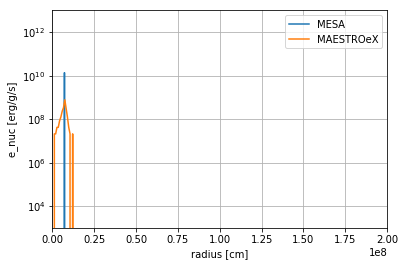

In [5]:
r_sun = 6.955e10  # cm
radius = np.array(a["radius"])
eps_nuc2 = a['eps_nuc_mc2']
eps_nuc_neu = a['eps_nuc_neu']
e_nuc = eps_nuc2-eps_nuc_neu
#e_nuc = eps_nuc_neu

plt.semilogy(radius*r_sun,e_nuc, label = 'MESA')
plt.semilogy(to_save['x'], -to_save['Hnuc'], label = 'MAESTROeX')
plt.xlabel("radius [cm]")
plt.ylabel("e_nuc [erg/g/s]")
plt.ylim(1e3,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_enuc_zoom.png")

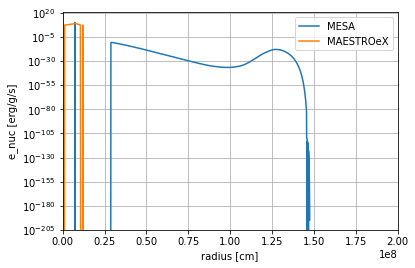

In [6]:
plt.semilogy(radius*r_sun,e_nuc, label = 'MESA')
plt.semilogy(to_save['x'], -to_save['Hnuc'], label = 'MAESTROeX')
plt.xlabel("radius [cm]")
plt.ylabel("e_nuc [erg/g/s]")
#plt.ylim(1e3,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_enuc.png")

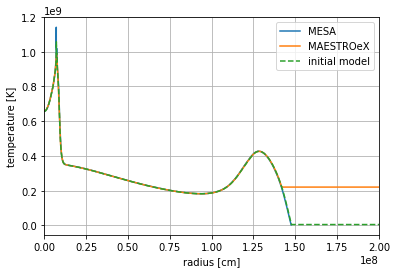

In [7]:
temp = np.array(a["temperature"])

plt.plot(radius*r_sun, temp, label = 'MESA')
plt.plot(to_save['x'], to_save['tfromp'], label = 'MAESTROeX')
plt.plot(df['radius'],df['temperature'],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.0e8)
plt.grid()
plt.legend()
plt.savefig(name+"_temperature.png")

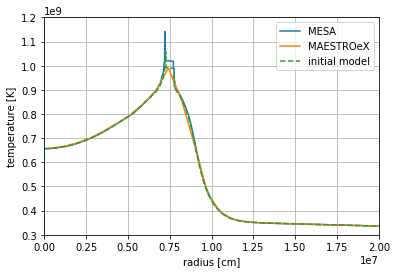

In [8]:
plt.plot(radius*r_sun, temp, label = 'MESA')
plt.plot(to_save['x'], to_save['tfromp'], label = 'MAESTROeX')
plt.plot(df['radius'],df['temperature'],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
plt.ylim(3.e8,1.2e9)
plt.xlim(0,2.0e7)
plt.grid()
plt.legend()
plt.savefig(name+"_temperature_zoom.png")

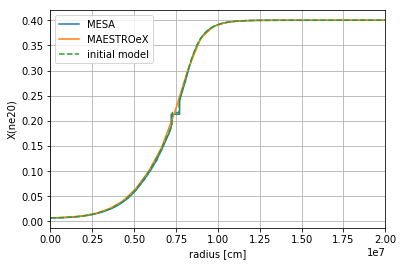

In [9]:
element = 'ne20'
y_axis = np.array(a[element])

plt.plot(radius*r_sun, y_axis, label = 'MESA')
plt.plot(to_save['x'], to_save["X("+element+")"], label = 'MAESTROeX')
plt.plot(df['radius'],df[element],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.e7)
plt.grid()
plt.legend()
plt.savefig(name+"_"+element+"_comp.png")

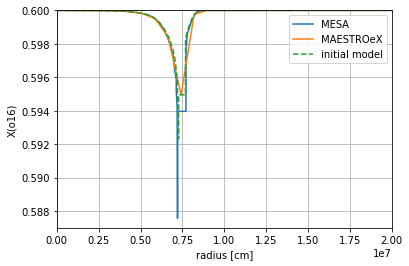

In [10]:
element = 'o16'
y_axis = np.array(a[element])

plt.plot(radius*r_sun, y_axis, label = 'MESA')
plt.plot(to_save['x'], to_save["X("+element+")"], label = 'MAESTROeX')
plt.plot(df['radius'],df[element],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.ylim(0.587,0.6)
plt.xlim(0,2.e7)
plt.grid()
plt.legend()
plt.savefig(name+"_"+element+"_comp.png")

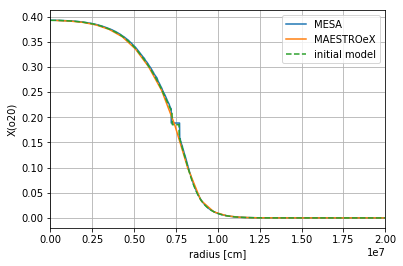

In [11]:
element = 'o20'
y_axis = np.array(a[element])

plt.plot(radius*r_sun, y_axis, label = 'MESA')
plt.plot(to_save['x'], to_save["X("+element+")"], label = 'MAESTROeX')
plt.plot(df['radius'],df[element],'--', label = 'initial model')
plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.ylim(1e6,1e13)
plt.xlim(0,2.e7)
plt.grid()
plt.legend()
plt.savefig(name+"_"+element+"_comp.png")

In [12]:
slc = yt.SlicePlot(ds, 'z', "tfromp")#, width=(3200,'km'))
slc.set_log('tfromp', False)
slc.save(name+"_tfromp.png")

yt : [INFO     ] 2019-05-05 03:01:52,130 xlim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:52,131 ylim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:52,134 xlim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:52,136 ylim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:52,139 Making a fixed resolution buffer of (('boxlib', 'tfromp')) 800 by 800
yt : [INFO     ] 2019-05-05 03:01:53,140 Saving plot smallplt0000001_512_tfromp.png


['smallplt0000001_512_tfromp.png']

In [13]:
slc = yt.SlicePlot(ds, 'z', "tfromp", width=(300,'km'))
slc.set_log('tfromp', False)
slc.save(name+"_tfromp_zoom.png")

yt : [INFO     ] 2019-05-05 03:01:53,919 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:01:53,920 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:01:53,923 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:01:53,927 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:01:53,932 Making a fixed resolution buffer of (('boxlib', 'tfromp')) 800 by 800
yt : [INFO     ] 2019-05-05 03:01:54,663 Saving plot smallplt0000001_512_tfromp_zoom.png


['smallplt0000001_512_tfromp_zoom.png']

In [23]:
slc = yt.SlicePlot(ds, 'z', "Hnuc", width=(300,'km'))
slc.save(name+"_Hnuc.png")

yt : [INFO     ] 2019-05-05 03:04:59,409 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:04:59,410 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:04:59,412 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:04:59,414 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:04:59,416 Making a fixed resolution buffer of (('boxlib', 'Hnuc')) 800 by 800
yt : [WARNING  ] 2019-05-05 03:04:59,690 Plot image for field ('boxlib', 'Hnuc') has no positive values.  Max = 0.000000.
yt : [WARNING  ] 2019-05-05 03:04:59,691 Switching to linear colorbar scaling.
yt : [INFO     ] 2019-05-05 03:05:00,046 Saving plot smallplt0000001_512_Hnuc.png


['smallplt0000001_512_Hnuc.png']

In [15]:
slc = yt.SlicePlot(ds, 'z', "radius")
slc.set_log('radius', False)
slc.save(name+"_radius.png")

yt : [INFO     ] 2019-05-05 03:01:58,867 xlim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:58,870 ylim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:58,874 xlim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:58,876 ylim = 0.000000 400000000.000000
yt : [INFO     ] 2019-05-05 03:01:58,881 Making a fixed resolution buffer of (('index', 'radius')) 800 by 800
yt : [INFO     ] 2019-05-05 03:02:00,243 Saving plot smallplt0000001_512_radius.png


['smallplt0000001_512_radius.png']

In [24]:
slc = yt.SlicePlot(ds, 'z', "X(ne20)", width=(300,'km'))
slc.set_log('X(ne20)', False)
slc.save(name+"_X(ne20).png")

yt : [INFO     ] 2019-05-05 03:05:15,643 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:15,644 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:15,647 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:15,648 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:15,652 Making a fixed resolution buffer of (('boxlib', 'X(ne20)')) 800 by 800
yt : [INFO     ] 2019-05-05 03:05:16,275 Saving plot smallplt0000001_512_X(ne20).png


['smallplt0000001_512_X(ne20).png']

In [25]:
slc = yt.SlicePlot(ds, 'z', "X(o20)", width=(300,'km'))
slc.set_log('X(o20)', False)
slc.save(name+"_X(o20).png")

yt : [INFO     ] 2019-05-05 03:05:55,824 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:55,825 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:55,827 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:55,828 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:05:55,833 Making a fixed resolution buffer of (('boxlib', 'X(o20)')) 800 by 800
yt : [INFO     ] 2019-05-05 03:05:56,458 Saving plot smallplt0000001_512_X(o20).png


['smallplt0000001_512_X(o20).png']

In [26]:
slc = yt.SlicePlot(ds, 'z', "X(o16)", width=(300,'km'))
slc.set_log('X(o16)', False)
slc.save(name+"_X(o16).png")

yt : [INFO     ] 2019-05-05 03:06:00,721 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:06:00,722 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:06:00,724 xlim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:06:00,726 ylim = 185000000.000000 215000000.000000
yt : [INFO     ] 2019-05-05 03:06:00,728 Making a fixed resolution buffer of (('boxlib', 'X(o16)')) 800 by 800
yt : [INFO     ] 2019-05-05 03:06:01,387 Saving plot smallplt0000001_512_X(o16).png


['smallplt0000001_512_X(o16).png']

In [19]:
to_save.head()

,x,tfromp,Hnuc,X(ne20),X(o16),X(o20)
0,390625.0,6.591081e+08,0.000000e+00,0.007685,0.599994,0.392317
1,1171875.0,6.660211e+08,-2.084072e+07,0.008802,0.599993,0.391201
2,1953125.0,6.798063e+08,-2.084072e+07,0.011425,0.599991,0.388578
3,2734375.0,7.001551e+08,-4.168143e+07,0.016487,0.599985,0.383518
4,3515625.0,7.274019e+08,-4.168143e+07,0.025422,0.599970,0.374589


In [20]:
to_save.to_csv('/Users/sailor/Desktop/asro_work/test/csv_result/'+name+".csv",index = False)

In [21]:
ds.derived_field_list

[('boxlib', 'Hnuc'),
 ('boxlib', 'X(ne20)'),
 ('boxlib', 'X(o16)'),
 ('boxlib', 'X(o20)'),
 ('boxlib', 'cell_volume'),
 ('boxlib', 'dx'),
 ('boxlib', 'dy'),
 ('boxlib', 'dz'),
 ('boxlib', 'path_element_x'),
 ('boxlib', 'path_element_y'),
 ('boxlib', 'path_element_z'),
 ('boxlib', 'tfromp'),
 ('boxlib', 'vertex_x'),
 ('boxlib', 'vertex_y'),
 ('boxlib', 'vertex_z'),
 ('boxlib', 'x'),
 ('boxlib', 'y'),
 ('boxlib', 'z'),
 ('gas', 'cell_volume'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dz'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'vertex_x'),
 ('gas', 'vertex_y'),
 ('gas', 'vertex_z'),
 ('gas', 'x'),
 ('gas', 'y'),
 ('gas', 'z'),
 ('index', 'cell_volume'),
 ('index', 'cylindrical_r'),
 ('index', 'cylindrical_radius'),
 ('index', 'cylindrical_theta'),
 ('index', 'cylindrical_z'),
 ('index', 'disk_angle'),
 ('index', 'dx'),
 ('index', 'dy'),
 ('index', 'dz'),
 ('index', 'grid_indices'),
 ('index', 'grid_level'),
 ('index', 'height'),
 ('

In [22]:
to_save

,x,tfromp,Hnuc,X(ne20),X(o16),X(o20)
0,390625.0,6.591081e+08,0.000000e+00,0.007685,0.599994,3.923174e-01
1,1171875.0,6.660211e+08,-2.084072e+07,0.008802,0.599993,3.912005e-01
2,1953125.0,6.798063e+08,-2.084072e+07,0.011425,0.599991,3.885781e-01
3,2734375.0,7.001551e+08,-4.168143e+07,0.016487,0.599985,3.835185e-01
4,3515625.0,7.274019e+08,-4.168143e+07,0.025422,0.599970,3.745889e-01
5,4296875.0,7.592518e+08,-8.336287e+07,0.040067,0.599928,3.599596e-01
6,5078125.0,7.930870e+08,-1.250443e+08,0.064373,0.599819,3.356945e-01
7,5859375.0,8.386477e+08,-2.292479e+08,0.099518,0.599503,3.006648e-01
8,6640625.0,8.921865e+08,-3.334515e+08,0.147067,0.598440,2.535016e-01
9,7421875.0,9.905496e+08,-7.711065e+08,0.216519,0.594952,1.852614e-01
